In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [2]:
data = pd.read_csv('GOOGL.csv')

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [5]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

data = data[['Close']]

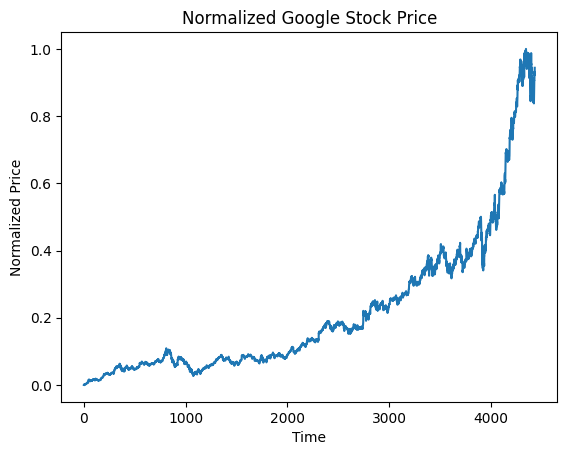

In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

plt.plot(scaled_data)
plt.title('Normalized Google Stock Price')
plt.xlabel('Time')
plt.ylabel('Normalized Price')
plt.show();

In [8]:
def create_sequences(data, time_step = 30):
  X, y = [], []
  for i in range(time_step, len(data)):
    X.append(data[i-time_step:i, 0])
    y.append(data[i, 0])
  return np.array(X), np.array(y)

In [10]:
time_step = 60

X, y = create_sequences(scaled_data, time_step)

X = X.reshape(X.shape[0], X.shape[1], 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = False)

In [11]:
model = Sequential()

model.add(SimpleRNN(units = 40, return_sequences = False, input_shape = (X_train.shape[1], 1)))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0070 - val_loss: 0.0083
Epoch 2/40
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.8418e-05 - val_loss: 0.0048
Epoch 3/40
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 2.6788e-05 - val_loss: 0.0040
Epoch 4/40
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 2.1937e-05 - val_loss: 0.0036
Epoch 5/40
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 2.0489e-05 - val_loss: 0.0035
Epoch 6/40
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 1.9252e-05 - val_loss: 0.0032
Epoch 7/40
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 2.0433e-05 - val_loss: 0.0029
Epoch 8/40
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.0823e-05 - val_loss: 0.0028
Epoch 9/40
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.8778e-05 - val_loss: 0.0027
Epoch 10/40
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 2.0471e-05 - val_loss: 0.0025
Epoch 11/40
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 1.8199e-05 - val_loss: 0.0022
E

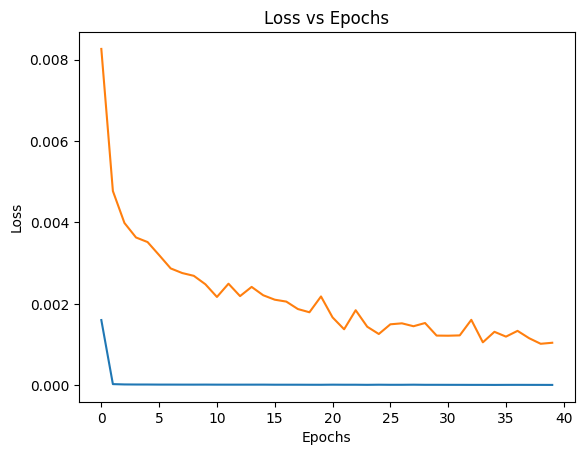

In [12]:
history = model.fit(X_train, y_train, epochs = 40, batch_size = 32, validation_data = (X_test, y_test))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label = 'Valiation Loss')
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step


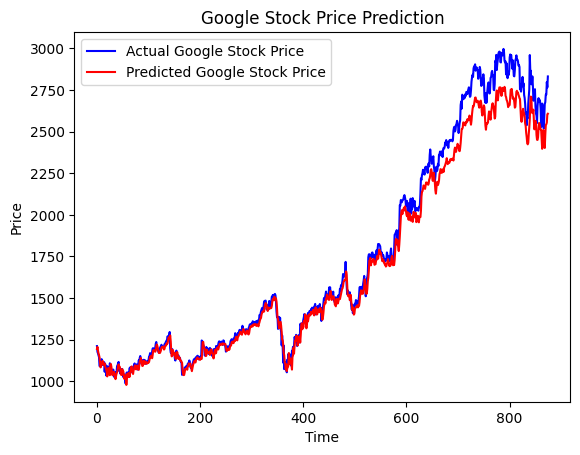

In [13]:
predicted_prices = model.predict(X_test)

predicted_prices = scaler.inverse_transform(predicted_prices)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.plot(y_test_actual, color='blue', label='Actual Google Stock Price')
plt.plot(predicted_prices, color='red', label='Predicted Google Stock Price')
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()